In [1]:
import sys
import warnings
warnings.filterwarnings('ignore')
import glob
!{sys.executable} -m pip install numpy pandas matplotlib scikit-learn pyarrow seaborn imblearn xgboost| grep -v 'already satisfied'

#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv("data/train.csv")

In [4]:
df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

<Axes: >

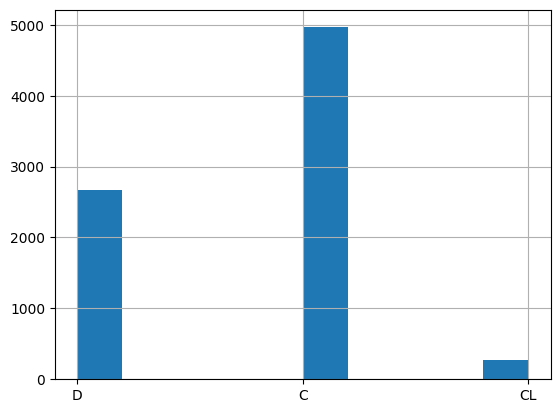

In [6]:
df["Status"].hist()

In [7]:
# unbalanced init!

In [8]:
df.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3952.000000,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,2282.121272,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,0.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1976.000000,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,3952.000000,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,5928.000000,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,7904.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


In [9]:
df.dtypes

id                 int64
N_Days             int64
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
Status            object
dtype: object

In [10]:
NaN_count = df.isna().sum(axis = 0)
NaN_count

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [11]:
# nothing empty! lez go

In [12]:
df.nunique()

id               7905
N_Days            461
Drug                2
Age               391
Sex                 2
Ascites             2
Hepatomegaly        2
Spiders             2
Edema               3
Bilirubin         111
Cholesterol       226
Albumin           160
Copper            171
Alk_Phos          364
SGOT              206
Tryglicerides     154
Platelets         227
Prothrombin        49
Stage               4
Status              3
dtype: int64

In [13]:
# create train and validation sets that are divided equally

In [14]:
from sklearn.model_selection import train_test_split

train, validation = train_test_split(df, stratify=df["Status"], test_size=0.2)

In [15]:
# Distribution in the train and validation set

Text(0.5, 0.98, 'Distribution of Disruptions in Training and Test Sets')

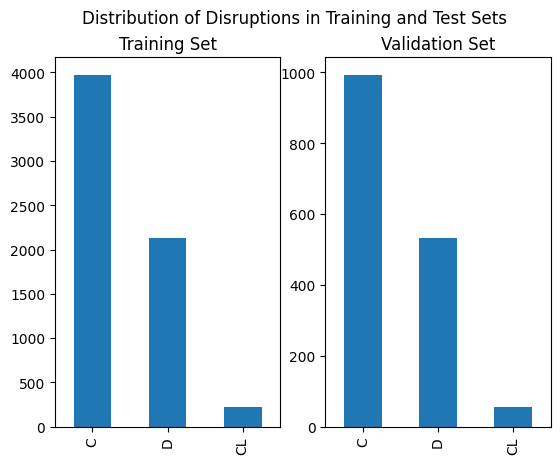

In [16]:
plt.subplot(1,2,1)
#train['Status'].hist()
train["Status"].value_counts().plot(kind="bar")

plt.title("Training Set")

plt.subplot(1,2,2)
#validation["Status"].hist()
validation["Status"].value_counts().plot(kind="bar")

plt.title("Validation Set")

plt.suptitle("Distribution of Disruptions in Training and Test Sets")

In [17]:
#the distribution is similar in training and test set

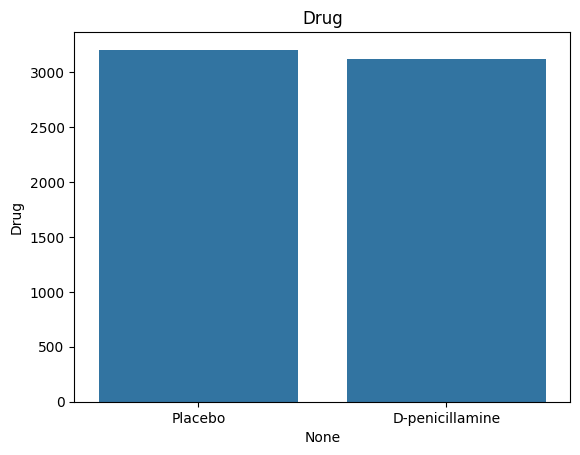

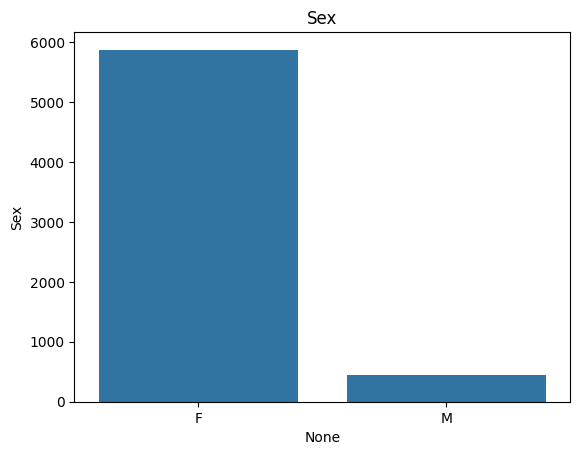

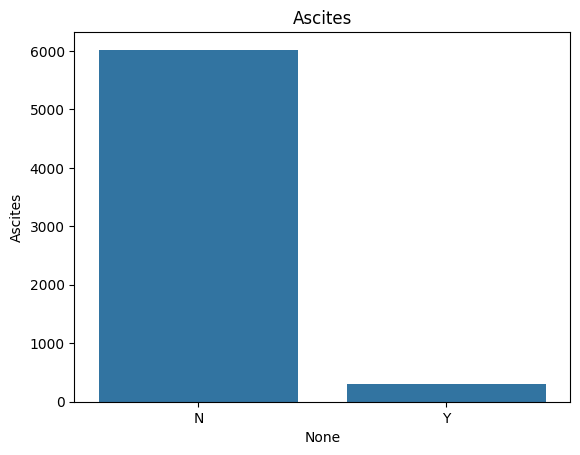

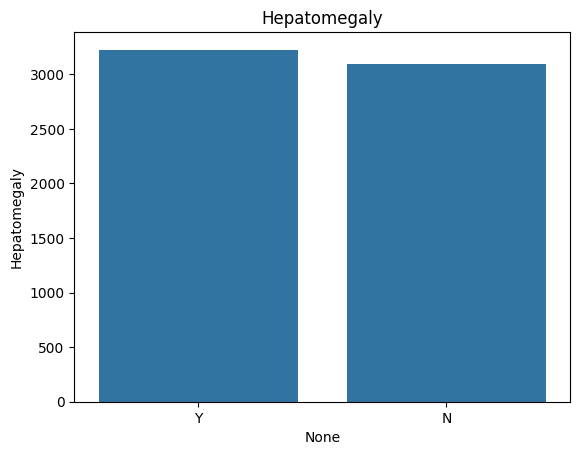

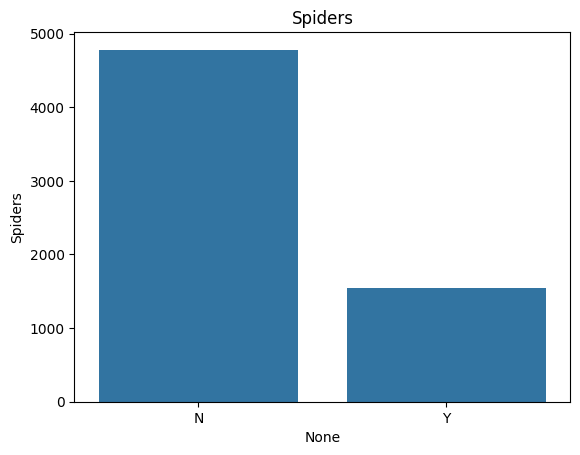

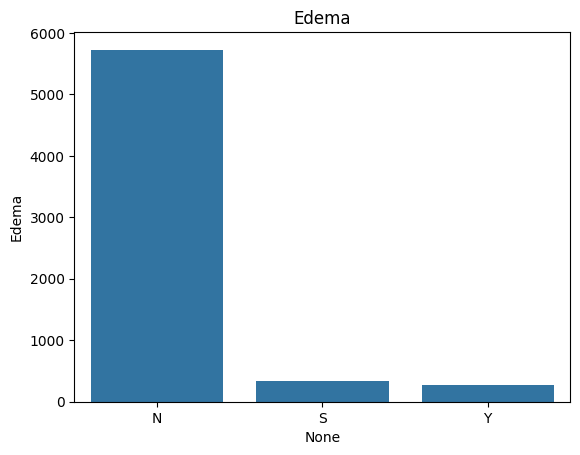

In [18]:
import seaborn as sns

categorical_values = ["Drug","Sex","Ascites","Hepatomegaly","Spiders","Edema"]

for i in categorical_values:
    sns.barplot(x=train[i].value_counts().index,y=train[i].value_counts()).set_title(i)
    plt.show()

In [19]:
# i should have done the stratified split which included sex, ascites, spiders, edema

In [20]:
# Will do it in the next iteration

In [21]:
train.Drug.replace(("Placebo", "D-penicillamine"), (0,1), inplace = True)
train.Sex.replace(("F", "M"), (0,1), inplace = True)
train.Ascites.replace(("N", "Y"), (0,1), inplace = True)
train.Hepatomegaly.replace(("N", "Y"), (0,1), inplace = True)
train.Spiders.replace(("N", "Y"), (0,1), inplace = True)
# train.Edema.replace(("N", "Y", "S"), (0,1,2), inplace = True)

In [22]:
#one hot encode the status and edema

In [23]:
status_dummies = pd.get_dummies(train.Status)
edema_dummies = pd.get_dummies(train.Edema)
train = pd.concat([train, edema_dummies, status_dummies], axis=1)

In [24]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,N,S,Y,C,CL,D
2931,2931,3853,0,16374,0,0,1,0,N,0.7,263.0,4.30,54.0,1472.0,116.25,90.0,217.0,10.2,3.0,D,1,0,0,0,0,1
3918,3918,708,1,22336,0,0,1,0,N,22.5,1000.0,3.82,88.0,1798.0,193.00,133.0,233.0,11.0,4.0,D,1,0,0,0,0,1
3864,3864,2301,1,10550,0,0,1,0,N,2.0,572.0,3.70,102.0,1050.0,117.00,113.0,328.0,10.6,3.0,CL,1,0,0,0,1,0
7760,7760,971,1,25568,1,0,1,0,N,2.1,262.0,3.93,111.0,1523.0,218.55,113.0,270.0,11.6,3.0,D,1,0,0,0,0,1
6090,6090,1487,0,16839,0,0,0,0,N,1.1,408.0,3.67,33.0,554.0,128.65,98.0,207.0,10.2,2.0,D,1,0,0,0,0,1


In [25]:
train.N.replace((False,True), (0,1), inplace = True)
train.S.replace((False,True), (0,1), inplace = True)
train.Y.replace((False,True), (0,1), inplace = True)
train.C.replace((False,True), (0,1), inplace = True)
train.CL.replace((False,True), (0,1), inplace = True)
train.D.replace((False,True), (0,1), inplace = True)

In [26]:
train = train.drop("Edema",axis = 1)
train = train.drop("Status",axis = 1)

In [27]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
2931,2931,3853,0,16374,0,0,1,0,0.7,263.0,4.30,54.0,1472.0,116.25,90.0,217.0,10.2,3.0,1,0,0,0,0,1
3918,3918,708,1,22336,0,0,1,0,22.5,1000.0,3.82,88.0,1798.0,193.00,133.0,233.0,11.0,4.0,1,0,0,0,0,1
3864,3864,2301,1,10550,0,0,1,0,2.0,572.0,3.70,102.0,1050.0,117.00,113.0,328.0,10.6,3.0,1,0,0,0,1,0
7760,7760,971,1,25568,1,0,1,0,2.1,262.0,3.93,111.0,1523.0,218.55,113.0,270.0,11.6,3.0,1,0,0,0,0,1
6090,6090,1487,0,16839,0,0,0,0,1.1,408.0,3.67,33.0,554.0,128.65,98.0,207.0,10.2,2.0,1,0,0,0,0,1


In [28]:
train.dtypes

id                 int64
N_Days             int64
Drug               int64
Age                int64
Sex                int64
Ascites            int64
Hepatomegaly       int64
Spiders            int64
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
N                  uint8
S                  uint8
Y                  uint8
C                  uint8
CL                 uint8
D                  uint8
dtype: object

In [29]:
numeric_values = ["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin","Stage"]

In [30]:
#visualise corelation matrix

In [31]:
train.corr()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
id,1.000000,-0.004389,0.006889,-0.017257,-0.010746,0.003533,0.007212,0.011075,0.007102,-0.010169,-0.022181,0.000659,-0.009490,0.021860,-0.002383,-0.007973,0.016294,-0.012976,0.004463,-0.008721,0.003126,-0.008636,0.012892,0.003832
N_Days,-0.004389,1.000000,0.002305,-0.103772,-0.058022,-0.253628,-0.279187,-0.207123,-0.342462,-0.148958,0.248828,-0.287814,-0.020639,-0.237841,-0.189227,0.154419,-0.149618,-0.212965,0.245764,-0.097909,-0.248595,0.341421,-0.067661,-0.322840
Drug,0.006889,0.002305,1.000000,0.095136,0.044113,0.047944,-0.061425,0.004789,-0.038547,0.002839,-0.032164,0.000874,-0.000975,-0.037264,-0.067635,-0.022750,-0.037722,-0.027085,-0.022566,-0.000523,0.033294,-0.017177,0.019722,0.009917
Age,-0.017257,-0.103772,0.095136,1.000000,0.101528,0.153458,0.106992,0.064606,0.093548,-0.055373,-0.114200,0.090353,0.026785,-0.015609,0.022388,-0.095840,0.129634,0.119348,-0.140816,0.081194,0.114824,-0.139052,-0.110597,0.185037
Sex,-0.010746,-0.058022,0.044113,0.101528,1.000000,0.043549,0.058233,-0.020414,0.040474,0.026965,-0.028510,0.151369,-0.002401,0.065358,0.066126,-0.046793,0.083901,0.034318,-0.050889,0.067677,-0.000689,-0.125596,0.014323,0.122857
Ascites,0.003533,-0.253628,0.047944,0.153458,0.043549,1.000000,0.183685,0.215808,0.380038,-0.044767,-0.318707,0.283109,0.041390,0.121079,0.120794,-0.175512,0.298921,0.168389,-0.514958,0.083527,0.654732,-0.257410,-0.022597,0.271934
Hepatomegaly,0.007212,-0.279187,-0.061425,0.106992,0.058233,0.183685,1.000000,0.328397,0.292601,0.142263,-0.263422,0.268139,0.130231,0.198407,0.157645,-0.188558,0.252393,0.498035,-0.228044,0.139832,0.176770,-0.382999,0.032408,0.379015
Spiders,0.011075,-0.207123,0.004789,0.064606,-0.020414,0.215808,0.328397,1.000000,0.254146,0.029055,-0.225462,0.258167,0.070634,0.144662,0.074078,-0.175748,0.280578,0.285636,-0.266870,0.140468,0.232365,-0.317761,0.012702,0.319954
Bilirubin,0.007102,-0.342462,-0.038547,0.093548,0.040474,0.380038,0.292601,0.254146,1.000000,0.297421,-0.295533,0.437159,0.132609,0.372886,0.309535,-0.081262,0.290619,0.193320,-0.323579,0.142865,0.311950,-0.420025,0.018350,0.422319
Cholesterol,-0.010169,-0.148958,0.002839,-0.055373,0.026965,-0.044767,0.142263,0.029055,0.297421,1.000000,-0.085157,0.168737,0.129842,0.337254,0.280760,0.088875,0.012964,0.036767,0.035416,-0.003445,-0.047560,-0.186985,0.063764,0.166456


<Axes: >

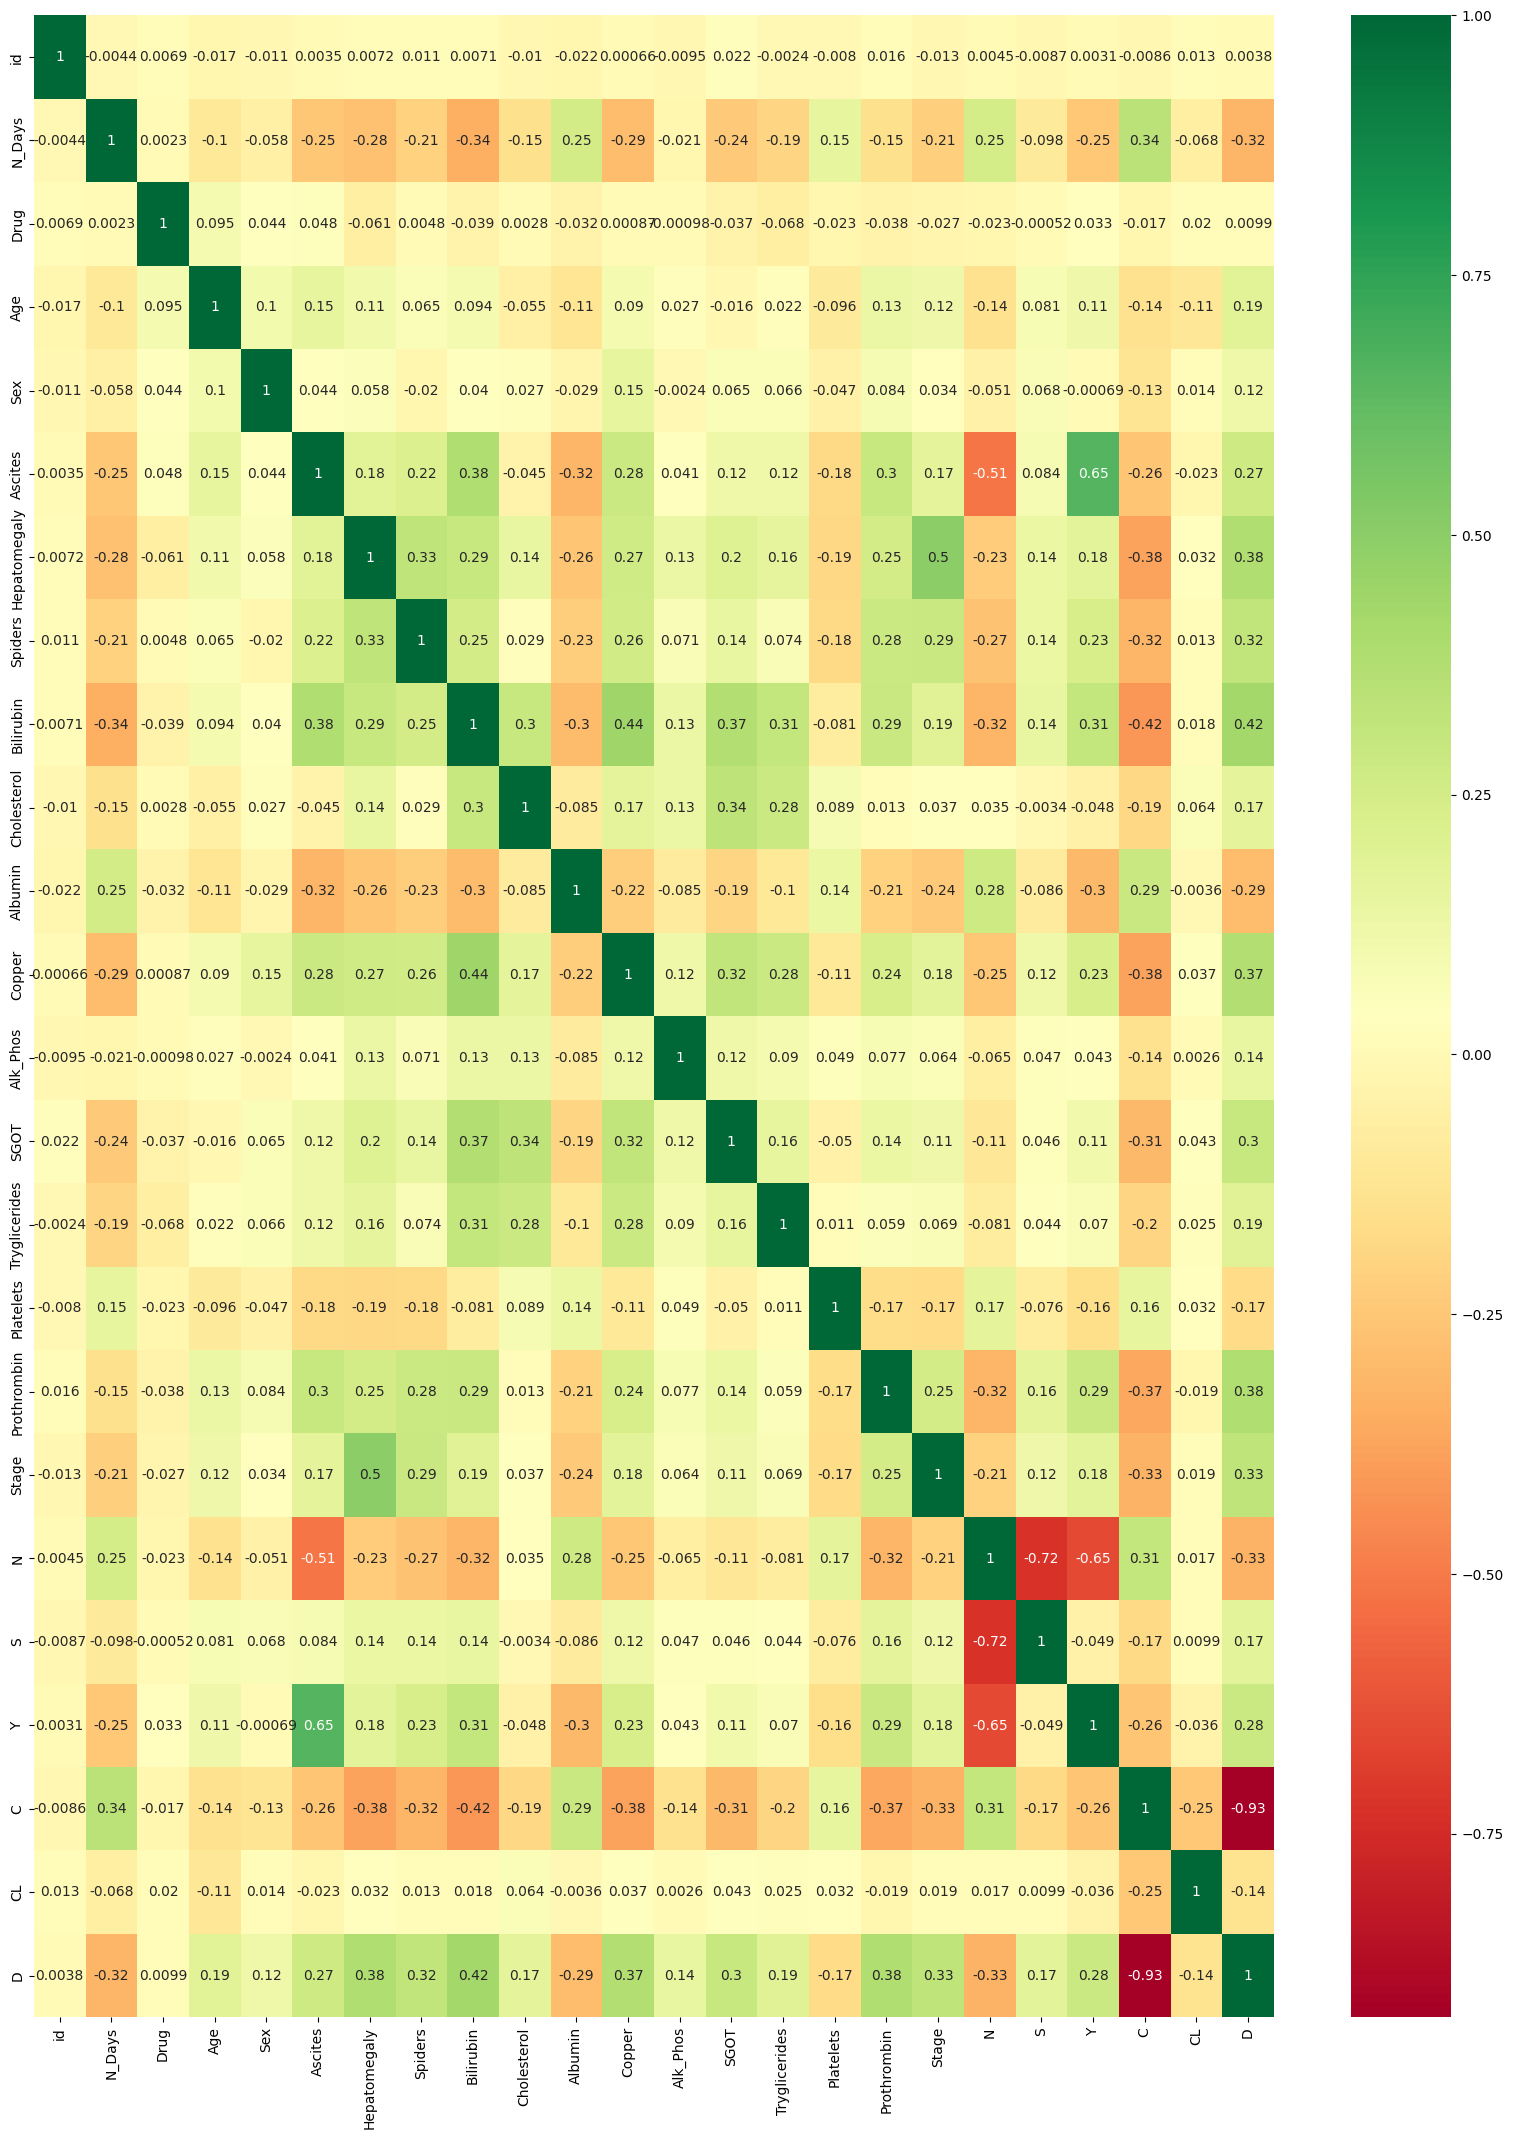

In [32]:
plt.figure(figsize=(20,26))
sns.heatmap(train.corr(), annot=True, cmap="RdYlGn")

In [38]:
features_to_scale = ["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin","Stage"]

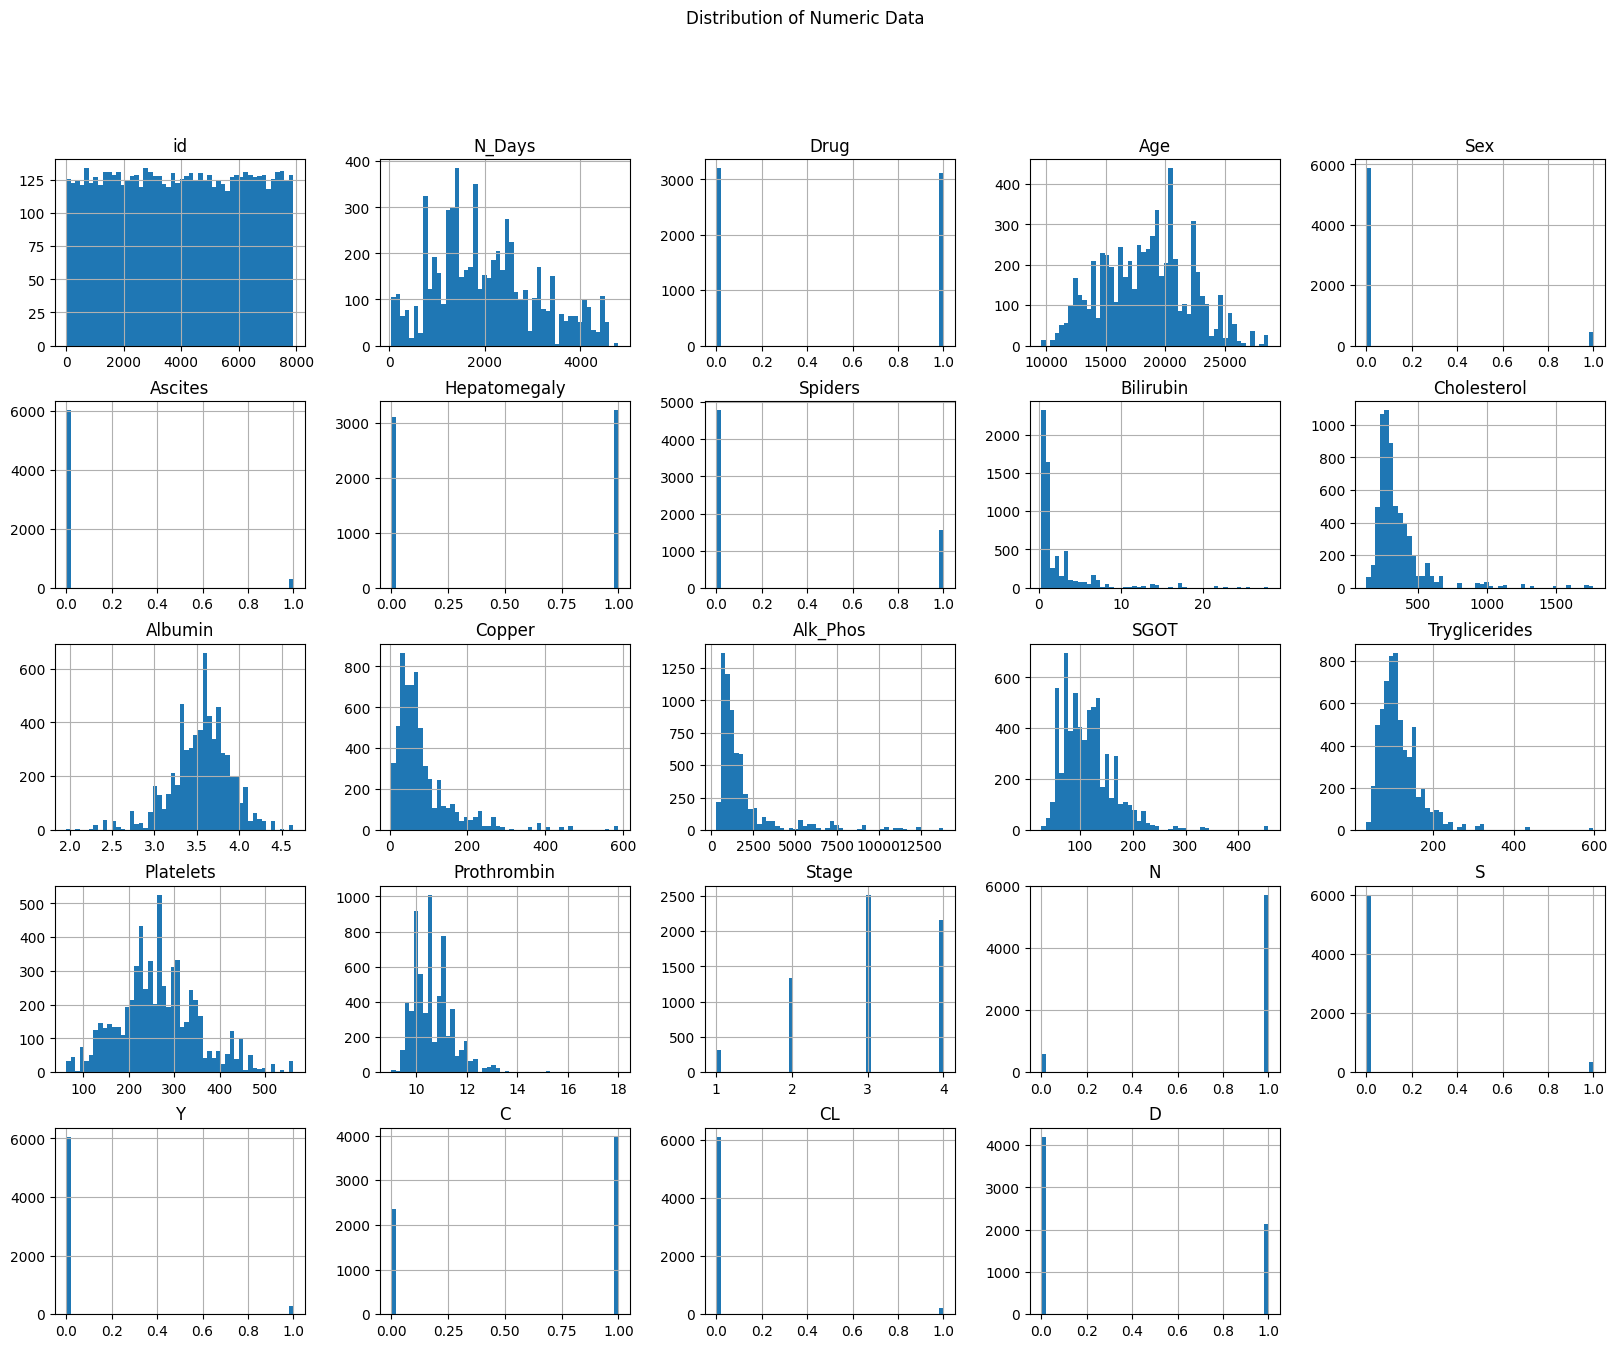

In [39]:
train.hist(bins=50, figsize=(20,15))
plt.suptitle("Distribution of Numeric Data")
plt.show()

In [40]:
#Most of the data here needs to be normalised, mostly right skewed

In [41]:
# lets look at the ones that matter

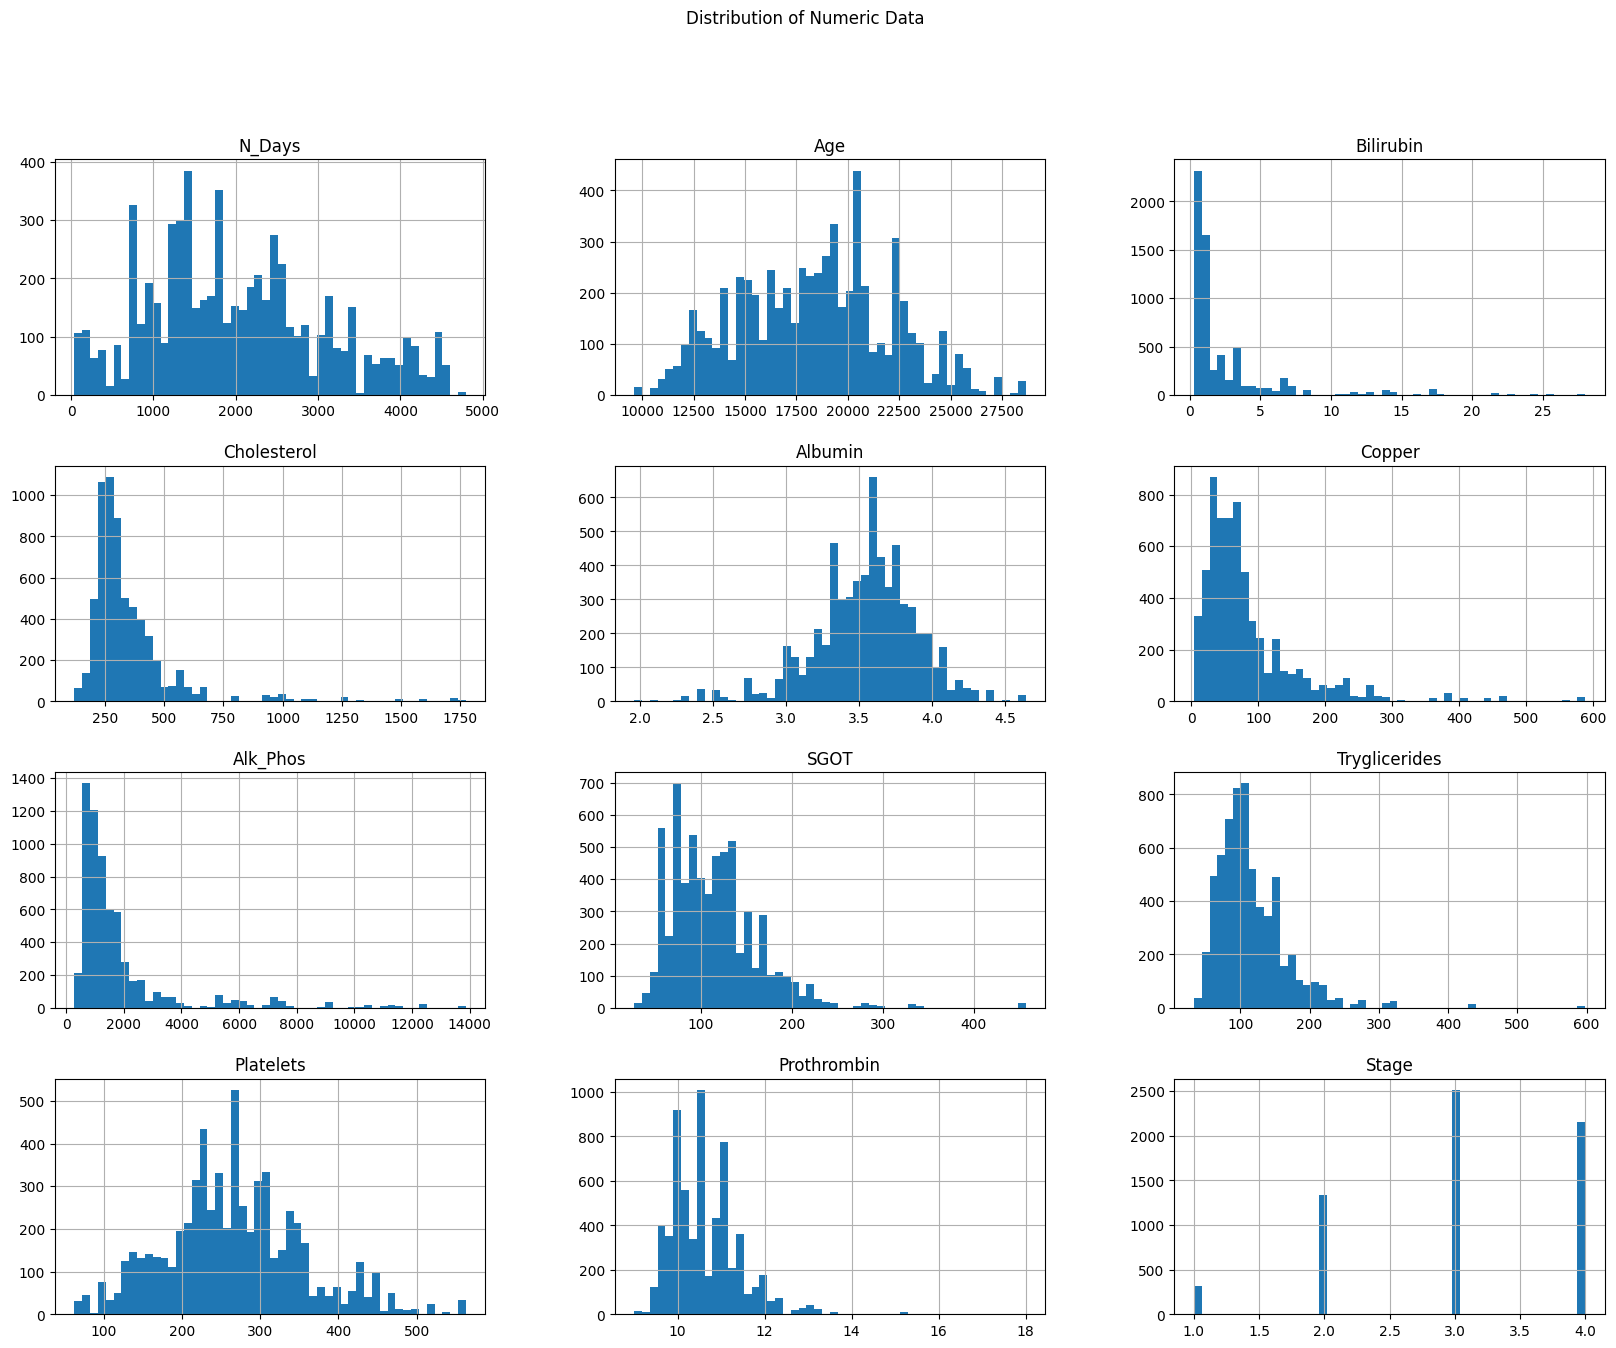

In [42]:
train[features_to_scale].hist(bins=50, figsize=(20,15))
plt.suptitle("Distribution of Numeric Data")
plt.show()

In [43]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer

features_to_scale = ["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin","Stage"]
# scaler_minmax = MinMaxScaler()
# train[features_to_scale] = scaler_minmax.fit_transform(train[features_to_scale])
transformer = FunctionTransformer(np.log1p)
train[features_to_scale] = transformer.transform(train[features_to_scale])

In [44]:
# viz after scaling

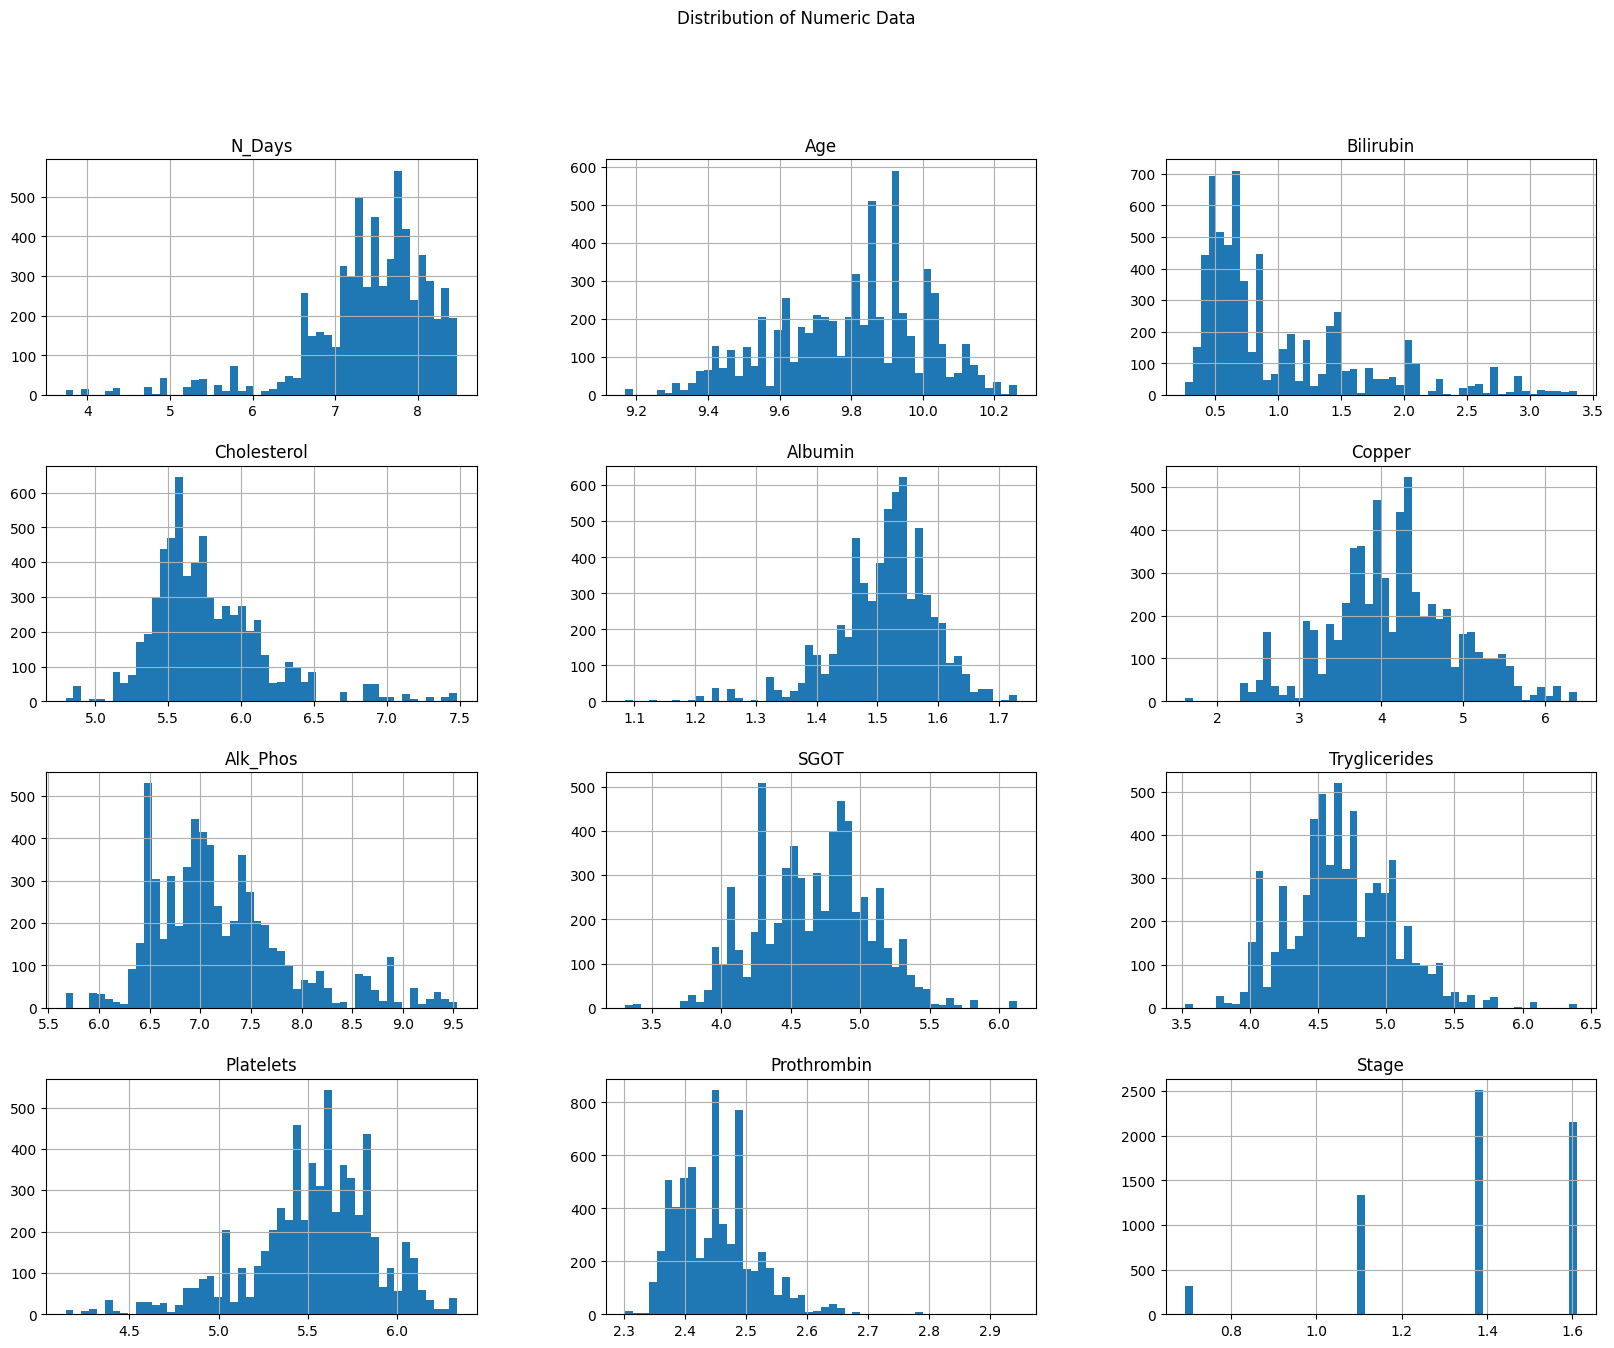

In [45]:
train[features_to_scale].hist(bins=50, figsize=(20,15))
plt.suptitle("Distribution of Numeric Data")
plt.show()

In [46]:
#looks scaled!!! atleast a bit, cause data is on a similar scale

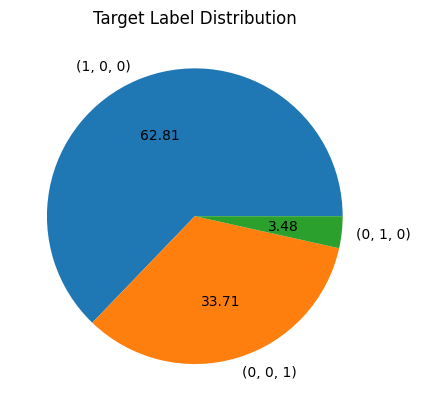

In [47]:
ax = train[["C","CL","D"]].value_counts().plot.pie(autopct="%.2f")
_ = ax.set_title("Target Label Distribution")

In [48]:
# looking at the target distribution, it looks like there's a big imbalence....... We need to balance the data ......

In [49]:
# for the next step i presume

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6324 entries, 2931 to 72
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6324 non-null   int64  
 1   N_Days         6324 non-null   float64
 2   Drug           6324 non-null   int64  
 3   Age            6324 non-null   float64
 4   Sex            6324 non-null   int64  
 5   Ascites        6324 non-null   int64  
 6   Hepatomegaly   6324 non-null   int64  
 7   Spiders        6324 non-null   int64  
 8   Bilirubin      6324 non-null   float64
 9   Cholesterol    6324 non-null   float64
 10  Albumin        6324 non-null   float64
 11  Copper         6324 non-null   float64
 12  Alk_Phos       6324 non-null   float64
 13  SGOT           6324 non-null   float64
 14  Tryglicerides  6324 non-null   float64
 15  Platelets      6324 non-null   float64
 16  Prothrombin    6324 non-null   float64
 17  Stage          6324 non-null   float64
 18  N      

In [60]:
#This function randomly deletes attributes
def make_random_nans(df, percent_rows, percent_columns):
    num_rows_to_nan = int(percent_rows * len(df))
    num_columns_to_nan = int(percent_columns * len(df.columns))

    rows_to_nan = np.random.choice(df.index, num_rows_to_nan, replace=False)

    for row in rows_to_nan:
        columns_to_nan = np.random.choice(df.columns, num_columns_to_nan, replace=False)
        df.loc[row, columns_to_nan] = np.nan

In [61]:
# Making 10% of random attributes NaN in 10% of random rows
make_random_nans(train, 0.1, 0.1)

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6324 entries, 2931 to 72
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6274 non-null   float64
 1   N_Days         6270 non-null   float64
 2   Drug           6267 non-null   float64
 3   Age            6273 non-null   float64
 4   Sex            6281 non-null   float64
 5   Ascites        6257 non-null   float64
 6   Hepatomegaly   6276 non-null   float64
 7   Spiders        6276 non-null   float64
 8   Bilirubin      6268 non-null   float64
 9   Cholesterol    6274 non-null   float64
 10  Albumin        6261 non-null   float64
 11  Copper         6276 non-null   float64
 12  Alk_Phos       6280 non-null   float64
 13  SGOT           6287 non-null   float64
 14  Tryglicerides  5644 non-null   float64
 15  Platelets      5642 non-null   float64
 16  Prothrombin    6273 non-null   float64
 17  Stage          6270 non-null   float64
 18  N      

In [64]:
NaN_count = train.isna().sum(axis = 0)
NaN_count

id                 50
N_Days             54
Drug               57
Age                51
Sex                43
Ascites            67
Hepatomegaly       48
Spiders            48
Bilirubin          56
Cholesterol        50
Albumin            63
Copper             48
Alk_Phos           44
SGOT               37
Tryglicerides     680
Platelets         682
Prothrombin        51
Stage              54
N                  48
S                  63
Y                1270
C                  49
CL                 56
D                  64
dtype: int64